In [3]:
%matplotlib inline
from ExKMC.Tree import Tree
from sklearn.datasets import make_blobs
import gdown
import pandas as pd
import copy
from sklearn.cluster import KMeans
from utils import calc_cost, plot_kmeans, plot_tree_boundary,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from utils import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# input data
def getDataDrive(url, output,isImport=False):
    """
    return pandas dataframe
    """
    if isImport:
        gdown.download(url=url, output=output, quiet=False)
    res = pd.read_csv(output)
    return res

In [4]:
neg = getDataDrive(url='https://drive.google.com/uc?id=1ocidTn7jUvCrLG_XJ6H9MiNUDexCkjFG', output='negtive.csv')
pos = getDataDrive(url='https://drive.google.com/uc?id=1IyMPjACBkz96giGJ-Z4IMk-qzM-1CJ9G', output='positive.csv' )

X_neg = copy.deepcopy(neg)
X_pos = copy.deepcopy(pos)


In [5]:
##########???????
###input data ?
pos_target = [1 for _ in range(X_pos.shape[0])]
neg_target = [0 for _ in range(X_neg.shape[0])]

X_pos['y'] = pos_target
X_neg['y'] = neg_target

X__ = pd.concat([X_pos,X_neg])

# exclue name -> X_
X_ = X__.loc[:, X__.columns!='name']

# exclude label -> X
y = X_['y']
X = X_.loc[:, X_.columns!='y']

# data preprocess
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(normalized_df) 


In [6]:
X.shape

(41257, 696)

In [7]:
# teee_n
k = 2
n = X.shape[0]


kmeans = KMeans(k, random_state=42)
kmeans.fit(X)

p = kmeans.predict(X)
# tree_n = Tree(k, max_leaves=n)
# tree_n.fit(X, kmeans)

# plot_tree_boundary(tree_n, k, X, kmeans, plot_mistakes=True)

<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Cluster label', ylabel='True label'>

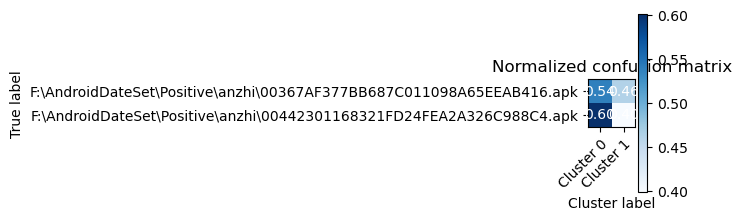

In [9]:
##########???????
plot_confusion_matrix(y, p, np.array(X__['name']), normalize=True)

In [23]:
X_.head(5)

,android.permission.CAMERA,android.permission.READ_CONTACTS,android.permission.WRITE_CONTACTS,android.permission.GET_ACCOUNTS,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_COARSE_LOCATION,android.permission.RECORD_AUDIO,android.permission.READ_PHONE_STATE,android.permission.CALL_PHONE,android.permission.READ_CALL_LOG,...,org/apache/harmony/crypto/internal/NullCipherSpi;engineInit,org/apache/harmony/crypto/internal/NullCipherSpi;engineUpdate,org/apache/harmony/crypto/internal/NullCipherSpi;engineGetIV,org/apache/harmony/crypto/internal/NullCipherSpi;engineDoFinal,org/apache/harmony/crypto/internal/NullCipherSpi;engineSetMode,org/apache/harmony/crypto/internal/NullCipherSpi;engineSetPadding,org/apache/harmony/crypto/internal/NullCipherSpi;engineGetBlockSize,org/apache/harmony/crypto/internal/NullCipherSpi;engineWrap,Unnamed: 696,y
0,1,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X.to_numpy()

array([[ 0.14217258, -0.02459058, -0.01603611, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13519644, -0.02338397, -0.01524924, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04615179, -0.04211419, -0.02746367, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.01579017, -0.01440876, -0.0093963 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0731547 , -0.01265305, -0.00825135, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05649159, -0.05154941, -0.0336166 , ...,  0.        ,
         0.        ,  0.        ]])

In [19]:
# visulization -> test with 2 
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(X.to_numpy())

kmeans_2 = KMeans(k, random_state=42)
kmeans_2.fit(df)


KMeans(n_clusters=2, random_state=42)

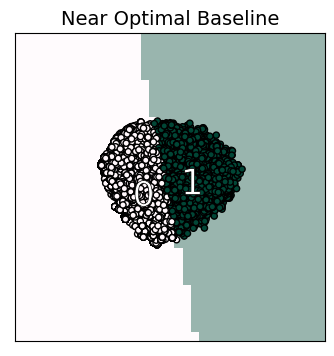

In [20]:
plot_kmeans(kmeans_2, x_data =df)

/home/sfy/Documents/VScodeProject/Thesis/utils.py:82: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([x[0] for x in mistakes], [x[1] for x in mistakes], marker='x', c='red', s=60, edgecolors='black', cmap=cmap)


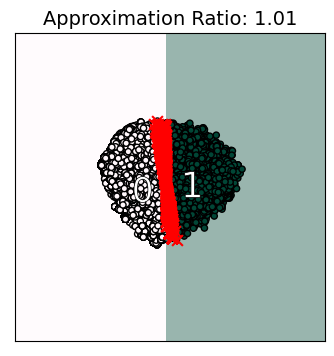

In [21]:
tree_n = Tree(k)
tree_n.fit(df, kmeans_2)

plot_tree_boundary(tree_n, k, df, kmeans_2, plot_mistakes=True)

In [25]:
# Initialize tree with up to 6 leaves, predicting 3 clusters
tree = Tree(k=k,max_leaves=n)

# Construct the tree, and return cluster labels
# prediction = tree.fit_predict(X,kmeans)
tree.fit(X, kmeans)

# Tree plot saved to filename
tree.plot("test2",feature_names=list(X_.columns))

: 

: 